# Importing libraries/defining settings/reading file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 81)

In [2]:
input_file = "../data/Kickstarter_unique.pkl"
df_kickstarter = pd.read_pickle(input_file)

# Overview of table

**Show head**

In [3]:
df_kickstarter.head()

,slug,name,blurb,category_lvl1,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month
416651,louli-a-lecole,Louli à l’école,Un livre enfant pour l’apprentissage des émoti...,publishing,children's books,FR,2019-06-26 13:14:09,2019-08-25 14:46:37,2019-06-26 14:46:37,684.396336,719.756813,successful,2019-08-25 14:46:37,31,469036700,https://www.kickstarter.com/projects/469036700...,2019-12-12,2019-12-01,2019-06-01
416652,strange-wit-an-original-graphic-novel-about-ja...,"Strange Wit, an original graphic novel about J...","The true biography of the historical figure, w...",comics,graphic novels,US,2015-08-05 02:11:53,2015-09-14 04:19:27,2015-08-15 04:19:27,12000.000000,14740.630000,successful,2015-09-14 04:19:28,403,1695121020,https://www.kickstarter.com/projects/katyrex/s...,2019-12-12,2019-12-01,2015-08-01
416653,fam-find-a-motive-mobile-app,FAM - FIND A MOTIVE MOBILE APP,FAM is the new mobile app which combines event...,technology,apps,GB,2018-06-07 19:53:22,2018-08-18 15:43:54,2018-06-19 15:43:54,132713.121000,14.598443,failed,2018-08-18 15:43:54,2,67455724,https://www.kickstarter.com/projects/findamoti...,2019-12-12,2019-12-01,2018-06-01
416654,destiny-ny-a-graphic-novel,"Destiny, NY - FINAL HOURS!",A graphic novel about two magical ladies in love.,comics,graphic novels,US,2016-09-06 08:33:56,2016-11-03 00:00:00,2016-10-04 07:22:10,20000.000000,21799.000000,successful,2016-11-03 00:00:00,406,248241887,https://www.kickstarter.com/projects/patshand/...,2019-12-12,2019-12-01,2016-09-01
416655,publishing-magus-magazine,Publishing Magus Magazine,We are publishing a magazine that focuses on t...,publishing,periodicals,US,2011-07-15 03:55:33,2011-10-04 17:04:28,2011-09-04 17:04:28,5000.000000,10.000000,failed,2011-10-04 17:04:28,1,1345074053,https://www.kickstarter.com/projects/134507405...,2019-12-12,2019-12-01,2011-07-01


**Find the total number of rows and columns with the shape attribute**

In [4]:
# first value shows #rows, second value #columns
df_kickstarter.shape

(175546, 19)

**Show data types**

In [5]:
df_kickstarter.dtypes

slug                        object
name                        object
blurb                       object
category_lvl1               object
category_lvl2               object
country                     object
created_at          datetime64[ns]
deadline            datetime64[ns]
launched_at         datetime64[ns]
usd_goal                   float64
usd_pledged                float64
state                       object
state_changed_at    datetime64[ns]
backers_count                int64
user_id                     object
project_url                 object
extract_date        datetime64[ns]
extract_month       datetime64[ns]
created_month       datetime64[ns]
dtype: object

**Show # of missing values per column**

In [6]:
df_kickstarter.isna().sum()

slug                   0
name                   0
blurb                  2
category_lvl1          0
category_lvl2       7980
country                0
created_at             0
deadline               0
launched_at            0
usd_goal               0
usd_pledged            0
state                  0
state_changed_at       0
backers_count          0
user_id              496
project_url            0
extract_date           0
extract_month          0
created_month          0
dtype: int64

In [7]:
df_kickstarter.isna().describe()

,slug,name,blurb,category_lvl1,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month
count,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546,175546
unique,1,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,175546,175546,175544,175546,167566,175546,175546,175546,175546,175546,175546,175546,175546,175546,175050,175546,175546,175546,175546


**Show only columns with missing values**

In [8]:
null_columns = df_kickstarter.isna().sum()
null_columns[null_columns.gt(0)]

blurb               2
category_lvl2    7980
user_id           496
dtype: int64

**Calculating percentage of missing values**

In [9]:
null_prop = null_columns[null_columns.gt(0)] / len(df_kickstarter)
null_columns[null_columns.gt(0)] / len(df_kickstarter)

blurb            0.000011
category_lvl2    0.045458
user_id          0.002825
dtype: float64

**Show statistics for all columns**

In [10]:
df_kickstarter.describe(include='all')

,slug,name,blurb,category_lvl1,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month
count,175546,175546,175544,175546,167566,175546,175546,175546,175546,1.755460e+05,1.755460e+05,175546,175546,175546.000000,175050,175546,175546,175546,175546
unique,175546,175001,174392,15,145,22,175461,164863,175401,NaN,NaN,2,165071,NaN,151120,175546,1,1,129
top,husks-a-zombie-card-game,Debut Album,The Decentralized Dance Party was founded on t...,music,web,US,2019-04-09 14:44:29,2019-11-01 03:59:00,2016-11-03 16:00:36,NaN,NaN,successful,2019-11-01 03:59:00,NaN,2104052526,https://www.kickstarter.com/projects/118476456...,2019-12-12 00:00:00,2019-12-01 00:00:00,2014-07-01 00:00:00
freq,1,6,17,25198,3653,124762,2,22,2,NaN,NaN,100517,22,NaN,67,1,175546,175546,4432
first,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-22 02:11:10,2009-05-16 09:59:00,2009-04-25 15:36:21,NaN,NaN,NaN,2009-05-16 10:00:25,NaN,NaN,NaN,2019-12-12 00:00:00,2019-12-01 00:00:00,2009-04-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-04 03:04:26,2019-12-12 05:30:24,2019-12-06 21:50:42,NaN,NaN,NaN,2019-12-12 05:30:24,NaN,NaN,NaN,2019-12-12 00:00:00,2019-12-01 00:00:00,2019-12-01 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.050917e+04,1.257745e+04,NaN,NaN,142.003839,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.116046e+06,9.496046e+04,NaN,NaN,897.804887,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-02,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+03,1.034262e+02,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


----

# Distribution categorical columns

## Analysis of Categories (lvl1/lvl2)

**Show absolute/relativ value counts**

*lvl1 categories*

In [11]:
# number of lvl1 categories
df_kickstarter.category_lvl1.nunique()

15

In [12]:
#summary statistics of the numerical values of lvl1
df_kickstarter.category_lvl1.describe()

count     175546
unique        15
top        music
freq       25198
Name: category_lvl1, dtype: object

In [13]:
#lvl1 - absolute value counts
df_kickstarter.category_lvl1.value_counts()

music           25198
film & video    24742
art             18787
technology      18213
publishing      17691
food            13969
games           11080
fashion          9407
comics           6725
design           6117
photography      5911
crafts           5748
theater          5049
journalism       3869
dance            3040
Name: category_lvl1, dtype: int64

In [14]:
#lvl1 - relative value counts
df_kickstarter.category_lvl1.value_counts(normalize=True)

music           0.143541
film & video    0.140943
art             0.107020
technology      0.103751
publishing      0.100777
food            0.079575
games           0.063117
fashion         0.053587
comics          0.038309
design          0.034846
photography     0.033672
crafts          0.032744
theater         0.028762
journalism      0.022040
dance           0.017317
Name: category_lvl1, dtype: float64

*lvl2 categories*

In [15]:
# number of lvl2 categories
df_kickstarter.category_lvl2.nunique()

145

In [16]:
#summary statistics of the numerical values of lvl2
df_kickstarter.category_lvl2.describe()

count     167566
unique       145
top          web
freq        3653
Name: category_lvl2, dtype: object

In [17]:
#lvl2 - absolute value counts
df_kickstarter.category_lvl2.value_counts()

web                   3653
comedy                2808
webseries             2388
public art            2387
narrative film        2387
hip-hop               2383
indie rock            2382
mobile games          2381
classical music       2381
country & folk        2380
mixed media           2379
pop                   2379
restaurants           2376
painting              2375
drinks                2374
drama                 2374
rock                  2373
art books             2371
animation             2370
software              2370
shorts                2361
graphic novels        2360
fiction               2358
hardware              2350
playing cards         2349
comic books           2344
nonfiction            2342
documentary           2332
children's books      2326
accessories           2321
illustration          2318
gadgets               2316
apparel               2301
video games           2294
apps                  2292
world music           2212
electronic music      2192
t

In [18]:
#lvl2 - relative value counts
df_kickstarter.category_lvl2.value_counts(normalize=True)

web                   0.021800
comedy                0.016758
webseries             0.014251
public art            0.014245
narrative film        0.014245
hip-hop               0.014221
indie rock            0.014215
mobile games          0.014209
classical music       0.014209
country & folk        0.014203
mixed media           0.014197
pop                   0.014197
restaurants           0.014179
painting              0.014174
drinks                0.014168
drama                 0.014168
rock                  0.014162
art books             0.014150
animation             0.014144
software              0.014144
shorts                0.014090
graphic novels        0.014084
fiction               0.014072
hardware              0.014024
playing cards         0.014018
comic books           0.013989
nonfiction            0.013977
documentary           0.013917
children's books      0.013881
accessories           0.013851
illustration          0.013833
gadgets               0.013821
apparel 

In [19]:
df_kickstarter.groupby(['category_lvl1']).count()

,slug,name,blurb,category_lvl2,country,created_at,deadline,launched_at,usd_goal,usd_pledged,state,state_changed_at,backers_count,user_id,project_url,extract_date,extract_month,created_month
category_lvl1,,,,,,,,,,,,,,,,,,
art,18787,18787,18786,17886,18787,18787,18787,18787,18787,18787,18787,18787,18787,18737,18787,18787,18787,18787
comics,6725,6725,6725,6426,6725,6725,6725,6725,6725,6725,6725,6725,6725,6698,6725,6725,6725,6725
crafts,5748,5748,5748,4613,5748,5748,5748,5748,5748,5748,5748,5748,5748,5738,5748,5748,5748,5748
dance,3040,3040,3040,1635,3040,3040,3040,3040,3040,3040,3040,3040,3040,3029,3040,3040,3040,3040
design,6117,6117,6117,5915,6117,6117,6117,6117,6117,6117,6117,6117,6117,6108,6117,6117,6117,6117
fashion,9407,9407,9406,9247,9407,9407,9407,9407,9407,9407,9407,9407,9407,9385,9407,9407,9407,9407
film & video,24742,24742,24742,24520,24742,24742,24742,24742,24742,24742,24742,24742,24742,24670,24742,24742,24742,24742
food,13969,13969,13969,13436,13969,13969,13969,13969,13969,13969,13969,13969,13969,13930,13969,13969,13969,13969
games,11080,11080,11080,11007,11080,11080,11080,11080,11080,11080,11080,11080,11080,11042,11080,11080,11080,11080


**LVL2 Categories per LVL1 Category**

In [20]:
df_kickstarter[['category_lvl1','category_lvl2']].groupby(['category_lvl1','category_lvl2']).count()

Empty DataFrame
Columns: []
Index: [(art, ceramics), (art, conceptual art), (art, digital art), (art, illustration), (art, installations), (art, mixed media), (art, painting), (art, performance art), (art, public art), (art, sculpture), (art, social practice), (art, textiles), (art, video art), (comics, anthologies), (comics, comic books), (comics, events), (comics, graphic novels), (comics, webcomics), (crafts, candles), (crafts, crochet), (crafts, diy), (crafts, embroidery), (crafts, glass), (crafts, knitting), (crafts, pottery), (crafts, printing), (crafts, quilts), (crafts, stationery), (crafts, taxidermy), (crafts, weaving), (crafts, woodworking), (dance, performances), (dance, residencies), (dance, spaces), (dance, workshops), (design, architecture), (design, civic design), (design, graphic design), (design, interactive design), (design, product design), (design, typography), (fashion, accessories), (fashion, apparel), (fashion, childrenswear), (fashion, couture), (fashion, footwear), (fashion, jewelry), (fashion, pet fashion), (fashion, ready-to-wear), (film & video, action), (film & video, animation), (film & video, comedy), (film & video, documentary), (film & video, drama), (film & video, experimental), (film & video, family), (film & video, fantasy), (film & video, festivals), (film & video, horror), (film & video, movie theaters), (film & video, music videos), (film & video, narrative film), (film & video, romance), (film & video, science fiction), (film & video, shorts), (film & video, television), (film & video, thrillers), (film & video, webseries), (food, bacon), (food, community gardens), (food, cookbooks), (food, drinks), (food, events), (food, farmer's markets), (food, farms), (food, food trucks), (food, restaurants), (food, small batch), (food, spaces), (food, vegan), (games, gaming hardware), (games, live games), (games, mobile games), (games, playing cards), (games, puzzles), (games, tabletop games), (games, video games), (journalism, audio), (journalism, photo), (journalism, print), (journalism, video), (journalism, web), (music, blues), (music, chiptune), (music, classical music), (music, comedy), (music, country & folk), (music, electronic music), (music, faith), (music, hip-hop), ...]

**Summary statistics category_lvl1**

In [21]:
df_kickstarter.groupby(['category_lvl1']).describe()

usd_goal                                                      \
                 count           mean           std       min          25%   
category_lvl1                                                                
art            18787.0   31850.942558  1.165283e+06  0.010000   611.485620   
comics          6725.0    6495.909299  2.044337e+04  0.511428  1000.000000   
crafts          5748.0    9196.150087  1.343823e+05  1.000000   550.000000   
dance           3040.0    7131.509589  2.490203e+04  5.000000  1757.468597   
design          6117.0   54004.149088  1.116644e+06  0.793289  1300.000000   
fashion         9407.0   15186.931054  2.103650e+05  0.764666   900.000000   
film & video   24742.0  105163.508211  2.211882e+06  0.766114  2000.000000   
food           13969.0   47831.704022  9.295570e+05  1.000000  4500.000000   
games          11080.0   34055.779762  9.646744e+05  0.761533  1500.000000   
journalism      3869.0   53330.891311  1.631900e+06  1.000000  1500.000000   
music          25198.0   10780.876750  9.521895e+04  0.643600  1683.971850   
photography     5911.0   12930.183583  1.330541e+05  1.000000  1237.903798   
publishing     17691.0   10436.366627  2.046131e+05  1.000000  1200.000000   
technology     18213.0   74840.669507  1.237358e+06  0.754790  5000.000000   
theater         5049.0   34031.781448  6.473708e+05  1.000000  1500.000000   

                                                       usd_pledged  \
                        50%           75%          max       count   
category_lvl1                                                        
art             2232.627930   6000.000000  100000000.0     18787.0   
comics          2910.000000   6500.000000    1000000.0      6725.0   
crafts          2000.000000   5880.914313   10000000.0      5748.0   
dance           3500.000000   6500.000000     700000.0      3040.0   
design          5000.000000  15000.000000   80000000.0      6117.0   
fashion         4593.023640  12000.000000   17917507.8      9407.0   
film & video    5560.943938  17000.000000  152350076.0     24742.0   
food           10000.000000  25465.423050  102344508.0     13969.0   
games           5106.280708  15000.000000  100000000.0     11080.0   
journalism      5000.000000  12500.000000  100000000.0      3869.0   
music           4000.000000   8000.000000    9000000.0     25198.0   
photography     4000.000000  10000.000000    7300000.0      5911.0   
publishing      3500.000000   8000.000000   25000000.0     17691.0   
technology     15000.000000  45000.000000  100000000.0     18213.0   
theater         3406.963500   8000.000000   40000000.0      5049.0   

                                                                           \
                       mean            std  min          25%          50%   
category_lvl1                                                               
art             4167.562046   25337.933504  0.0   109.348482   851.000000   
comics          9359.454101   25315.551134  0.0  1065.000000  3021.000000   
crafts          2731.395067   10766.149860  0.0    21.000000   233.433462   
dance           4346.356140    6381.996138  0.0   888.839925  2684.500000   
design         34145.675635  210847.588406  0.0   221.487791  2557.010000   
fashion        12454.211404   68749.234321  0.0   215.921983  1551.000000   
film & video   10553.571328   96919.979299  0.0   115.000000  1970.024170   
food            6511.901972   33962.767374  0.0    18.185027   312.000000   
games          30822.088330  189497.285599  0.0   242.750000  3088.050103   
journalism      4245.771613   18256.560623  0.0     1.995664   100.000000   
music           5269.175038   15283.533370  0.0   277.000000  2275.000000   
photography     5818.877276   28171.297050  0.0    20.000000   435.000000   
publishing      7100.594985   22221.247442  0.0   355.000000  2281.676921   
technology     37630.716301  175038.288016  0.0    50.000000  1291.449075   
theater         4669.048795   14400.498

In [22]:
df_kickstarter.groupby(['category_lvl1']).describe().transpose()

category_lvl1                 art          comics        crafts  \
usd_goal      count  1.878700e+04     6725.000000  5.748000e+03   
              mean   3.185094e+04     6495.909299  9.196150e+03   
              std    1.165283e+06    20443.371991  1.343823e+05   
              min    1.000000e-02        0.511428  1.000000e+00   
              25%    6.114856e+02     1000.000000  5.500000e+02   
              50%    2.232628e+03     2910.000000  2.000000e+03   
              75%    6.000000e+03     6500.000000  5.880914e+03   
              max    1.000000e+08  1000000.000000  1.000000e+07   
usd_pledged   count  1.878700e+04     6725.000000  5.748000e+03   
              mean   4.167562e+03     9359.454101  2.731395e+03   
              std    2.533793e+04    25315.551134  1.076615e+04   
              min    0.000000e+00        0.000000  0.000000e+00   
              25%    1.093485e+02     1065.000000  2.100000e+01   
              50%    8.510000e+02     3021.000000  2.334335e+02   
              75%    3.304650e+03     7433.000000  1.628569e+03   
              max    1.924018e+06   665725.940000  4.547175e+05   
backers_count count  1.878700e+04     6725.000000  5.748000e+03   
              mean   5.685389e+01      195.329071  4.267606e+01   
              std    2.573406e+02      383.369178  2.066638e+02   
              min    0.000000e+00        0.000000  0.000000e+00   
              25%    3.000000e+00       34.000000  2.000000e+00   
              50%    1.900000e+01       84.000000  6.000000e+00   
              75%    5.400000e+01      193.000000  3.100000e+01   
              max    2.284000e+04     7199.000000  1.270500e+04   

category_lvl1                dance        design       fashion  film & video  \
usd_goal      count    3040.000000  6.117000e+03  9.407000e+03  2.474200e+04   
              mean     7131.509589  5.400415e+04  1.518693e+04  1.051635e+05   
              std     24902.033845  1.116644e+06  2.103650e+05  2.211882e+06   
              min         5.000000  7.932894e-01  7.646657e-01  7.661145e-01   
              25%      1757.468597  1.300000e+03  9.000000e+02  2.000000e+03   
              50%      3500.000000  5.000000e+03  4.593024e+03  5.560944e+03   
              75%      6500.000000  1.500000e+04  1.200000e+04  1.700000e+04   
              max    700000.000000  8.000000e+07  1.791751e+07  1.523501e+08   
usd_pledged   count    3040.000000  6.117000e+03  9.407000e+03  2.474200e+04   
              mean     4346.356140  3.414568e+04  1.245421e+04  1.055357e+04   
              std      6381.996138  2.108476e+05  6.874923e+04  9.691998e+04   
              min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
              25%       888.839925  2.214878e+02  2.159220e+02  1.150000e+02   
              50%      2684.500000  2.557010e+03  1.551000e+03  1.970024e+03   
              75%      5351.750000  1.544980e+04  8.963357e+03  7.940176e+03   
              max    146075.970000  1.214344e+07  3.948547e+06  1.138545e+07   
backers_count count    3040.000000  6.117000e+03  9.407000e+03  2.474200e+04   
              mean       52.198684  3.150742e+02  1.217095e+02  1.123330e+02   
              std        95.308305  1.270206e+03  5.017623e+02  1.032882e+03   
              min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
              25%        15.000000  7.000000e+00  5.000000e+00  4.000000e+00   
              50%        36.000000  4.300000e+01  3.100000e+01  2.500000e+01   
              75%        66.000000  1.690000e+02  9.500000e+01  7.900000e+01   
              max      4133.000000  3.210200e+04  2.140900e+04  9.158500e+04   

category_lvl1                food         games    journalism         music  \
usd_goal      count  1.396900e+04  1.108000e+04  3.869000e+03  2.519800e+04   
              mean   4.783170e+04  3.405578e+04  5.333089e+04  1.078088e+04   
              std    9.295570e+05  9.646744e+05  1.631900e+06  9.521895e+04   
       

**Summary statistics grouped by category_lvl1 + lvl2**

In [23]:
df_kickstarter.groupby(['category_lvl1', 'category_lvl2']).describe()

usd_goal                              \
                                    count          mean           std   
category_lvl1 category_lvl2                                             
art           ceramics              374.0  1.100285e+04  5.483301e+04   
              conceptual art       1079.0  4.089340e+04  6.354675e+05   
              digital art          1705.0  7.993085e+03  5.051841e+04   
              illustration         2318.0  2.187563e+03  3.803736e+03   
              installations         580.0  1.213039e+05  2.086126e+06   
              mixed media          2379.0  3.234628e+04  1.020818e+06   
              painting             2375.0  4.960213e+04  2.052024e+06   
              performance art      2184.0  1.320486e+04  8.662261e+04   
              public art           2387.0  8.158052e+04  2.048368e+06   
              sculpture            1892.0  1.396607e+04  5.770479e+04   
              social practice        31.0  1.603631e+04  1.802692e+04   
              textiles              353.0  2.323652e+04  2.370528e+05   
              video art             229.0  2.391928e+04  1.265523e+05   
comics        anthologies           636.0  8.466226e+03  1.259485e+04   
              comic books          2344.0  2.743713e+03  3.497952e+03   
              events                182.0  1.205563e+04  3.986813e+04   
              graphic novels       2360.0  8.325866e+03  2.004142e+04   
              webcomics             904.0  9.607569e+03  3.868236e+04   
crafts        candles               499.0  5.632656e+03  2.406838e+04   
              crochet               183.0  2.496845e+03  6.687930e+03   
              diy                  1273.0  1.845019e+04  2.823848e+05   
              embroidery            136.0  4.649141e+03  5.798865e+03   
              glass                 149.0  8.365264e+03  1.924153e+04   
              knitting              207.0  6.205204e+03  9.480158e+03   
              pottery               142.0  6.662138e+03  9.256895e+03   
              printing              256.0  7.123238e+03  2.110166e+04   
              quilts                 86.0  1.111384e+04  2.118185e+04   
              stationery            279.0  6.131033e+03  1.948955e+04   
              taxidermy              10.0  4.519512e+03  4.606262e+03   
              weaving               101.0  1.381093e+04  6.645599e+04   
              woodworking          1292.0  9.749268e+03  2.852670e+04   
dance         performances         1163.0  8.207942e+03  3.450063e+04   
              residencies            81.0  1.073543e+04  5.088500e+04   
              spaces                219.0  1.454031e+04  2.758979e+04   
              workshops             172.0  9.318126e+03  1.739630e+04   
design        architecture          780.0  2.892263e+05  3.077704e+06   
              civic design          320.0  1.293286e+05  7.087802e+05   
              graphic design       2173.0  9.024372e+03  1.085136e+05   
              interactive design    425.0  3.290493e+04  1.221131e+05   
              product design       2085.0  1.272410e+04  2.128074e+04   
              typography            132.0  1.256098e+04  4.140445e+04   
fashion       accessories          2321.0  3.931087e+03  7.567468e+03   
              apparel              2301.0  1.120257e+04  3.805348e+04   
              childrenswear         556.0  1.475427e+04  3.402305e+04   
              couture               286.0  5.784537e+04  5.352535e+05   
              footwear             1141.0  2.444050e+04  5.326298e+04   
              jewelry              1494.0  9.367664e+03  2.781846e+04   
              pet fashion           156.0  1.953105e+04  8.189923e+04   
              ready-to-wear         992.0  3.732324e+04  5.713779e+05   
film & video  action                783.0  2.839826e+05  3.161061e+06   
              animation            2370.0  8.693023e+04  2.069937e+06   
              comedy               2369.0  7.503784e+04  1.602531e+06   
              docu

----

## Analysis of Country

**Show absolute/relativ value counts**

In [24]:
# number of countries
df_kickstarter.country.nunique()

22

In [25]:
#summary statistics of the numerical values of country
df_kickstarter.country.describe()

count     175546
unique        22
top           US
freq      124762
Name: country, dtype: object

In [26]:
#country - absolute value counts
df_kickstarter.country.value_counts()

US    124762
GB     19199
CA      8026
AU      4082
DE      2921
FR      2282
MX      2093
IT      2047
ES      1691
NL      1503
SE      1180
HK       840
NZ       797
DK       769
CH       574
SG       553
IE       529
BE       498
AT       414
NO       411
JP       323
LU        52
Name: country, dtype: int64

In [27]:
#country - relative value counts
df_kickstarter.country.value_counts(normalize=True)

US    0.710708
GB    0.109367
CA    0.045720
AU    0.023253
DE    0.016640
FR    0.012999
MX    0.011923
IT    0.011661
ES    0.009633
NL    0.008562
SE    0.006722
HK    0.004785
NZ    0.004540
DK    0.004381
CH    0.003270
SG    0.003150
IE    0.003013
BE    0.002837
AT    0.002358
NO    0.002341
JP    0.001840
LU    0.000296
Name: country, dtype: float64

**Summary statistics grouped by country**

In [28]:
df_kickstarter.groupby(['country']).describe()

usd_goal                                                        \
            count           mean           std         min          25%   
country                                                                   
AT          414.0   43338.314804  1.744873e+05   10.829918  3299.566237   
AU         4082.0   68018.490049  1.540332e+06    0.716763  1205.419103   
BE          498.0   50749.217060  4.385461e+05    1.120134  1870.902272   
CA         8026.0   34480.100959  9.484239e+05    0.746330  1125.764216   
CH          574.0  426512.011426  5.210499e+06   20.535420  3079.899270   
DE         2921.0   70405.817238  1.975915e+06    1.129553  2116.081900   
DK          769.0   18903.088431  8.324903e+04    0.757410  1198.436710   
ES         1691.0   46429.434682  5.075299e+05    1.054650  1659.848745   
FR         2282.0   40073.422280  6.105587e+05    1.108704  1763.536864   
GB        19199.0   28846.507230  1.126487e+06    1.228667   909.321684   
HK          840.0   17138.548280  4.608131e+04    1.286209  1879.674640   
IE          529.0   20950.158131  9.890837e+04   52.999788  1628.565480   
IT         2047.0   62156.334642  6.959683e+05    1.076644  2161.262930   
JP          323.0   19742.750618  6.589805e+04    0.923175  1359.853500   
LU           52.0   23388.823781  3.905314e+04  323.789056  2037.568065   
MX         2093.0   11140.529948  1.151110e+05    0.511428  1294.686750   
NL         1503.0   86700.830137  2.251900e+06    1.128150  1978.006712   
NO          411.0   17320.725299  4.659336e+04    7.349250  1583.003570   
NZ          797.0   13610.923540  6.068710e+04    0.643600  1021.582635   
SE         1180.0   34466.873607  3.850673e+05    0.891703  1232.195532   
SG          553.0   14547.140615  4.317652e+04    7.369197   899.875114   
US       124762.0   39629.121301  1.059716e+06    0.010000  1550.000000   

                                                  usd_pledged                \
                  50%           75%           max       count          mean   
country                                                                       
AT        9198.582785  26529.617663  2.753874e+06       414.0  19060.067981   
AU        3896.556075  11926.613625  9.289424e+07      4082.0   7980.161381   
BE        5582.114900  15933.422250  9.241199e+06       498.0   8337.913752   
CA        3820.947350  11135.422050  7.999878e+07      8026.0   8605.937573   
CH       10632.380053  29943.956550  1.023445e+08       574.0  15827.939009   
DE        6170.761795  18484.607250  1.059990e+08      2921.0  13576.357701   
DK        3791.690000  11883.205320  1.507923e+06       769.0  10813.402121   
ES        5509.854350  17975.799750  1.659365e+07      1691.0  11185.414334   
FR        5828.939400  17255.166225  2.805625e+07      2282.0  13868.599742   
GB        3186.687300   9718.471388  1.523501e+08     19199.0   8839.691863   
HK        5109.833600  12766.487000  7.733685e+05       840.0  28842.343779   
IE        5084.613630  15251.691000  1.995743e+06       529.0   9956.137264   
IT        6727.211580  22871.035300  2.349795e+07      2047.0   8116.180841   
JP        4513.595000  13557.660000  8.078580e+05       323.0  19674.830040   
LU        5915.419500  24641.299113  1.750880e+05        52.0  13581.609949   
MX        2629.637000   5404.226300  5.021215e+06      2093.0   1843.966703   
NL        6418.244940  21543.587000  8.723709e+07      1503.0  12291.688591   
NO        4729.958000  12892.556000  4.362877e+05       411.0   9142.902299   
NZ        3583.266150  10374.448500  1.309579e+06       797.0   6137.817907   
SE        4525.423600  12149.532250  1.178599e+07      1180.0  10908.010018   
SG        3662.735350  11299.069050  7.310310e+05       553.0   9420.333103   
US        5000.000000  13200.000000  1.000000e+08    124762.0  13743.484597   

                                                                    \
                   std  min         25%          50%           75%   
country          

## Analysis of state

**Show absolute/relativ value counts**

In [29]:
# number of states
df_kickstarter.state.nunique()

2

In [30]:
#summary statistics of the numerical values of state
df_kickstarter.state.describe()

count         175546
unique             2
top       successful
freq          100517
Name: state, dtype: object

In [31]:
#state - absolute value counts
df_kickstarter.state.value_counts()

successful    100517
failed         75029
Name: state, dtype: int64

In [32]:
#state - relative value counts
df_kickstarter.state.value_counts(normalize=True)

successful    0.572596
failed        0.427404
Name: state, dtype: float64

**Summary statistics grouped by state**

In [33]:
df_kickstarter.groupby(['state']).describe()

usd_goal                                                    \
               count          mean           std   min     25%     50%   
state                                                                    
failed       75029.0  82662.993701  1.705936e+06  1.00  2500.0  7000.0   
successful  100517.0   9044.251554  2.658181e+04  0.01  1000.0  3500.0   

                                    usd_pledged                               \
                   75%          max       count          mean            std   
state                                                                          
failed      22073.0818  152350076.0     75029.0   1082.000823    5606.522493   
successful   9600.0000    2000000.0    100517.0  21158.008279  124710.715065   

                                                                          \
                 min          25%          50%          75%          max   
state                                                                      
failed      0.000000     1.093159    56.058592    441.00000    607628.38   
successful  0.913912  1755.000000  4860.000000  12447.28281  12143435.67   

           backers_count                                                   \
                   count        mean          std  min   25%   50%    75%   
state                                                                       
failed           75029.0   12.145984    45.928325  0.0   1.0   3.0    9.0   
successful      100517.0  238.933762  1176.505717  1.0  32.0  69.0  160.0   

                      
                 max  
state                 
failed        4435.0  
successful  105857.0

---

## Analysis of user_id

**Show absolute/relativ value counts**

In [34]:
# number of user_id
df_kickstarter.user_id.nunique()

151120

In [35]:
#summary statistics of the numerical values of user_id
df_kickstarter.user_id.describe()

count         175050
unique        151120
top       2104052526
freq              67
Name: user_id, dtype: object

In [36]:
#user_id - absolute value counts
df_kickstarter.user_id.value_counts()

2104052526    67
957058942     51
1323060510    37
1655558466    31
63602967      31
              ..
922360928      1
1225890668     1
2110766744     1
1279556386     1
1822613025     1
Name: user_id, Length: 151120, dtype: int64

In [37]:
#user_id - relative value counts
df_kickstarter.user_id.value_counts(normalize=True)

2104052526    0.000383
957058942     0.000291
1323060510    0.000211
1655558466    0.000177
63602967      0.000177
                ...   
922360928     0.000006
1225890668    0.000006
2110766744    0.000006
1279556386    0.000006
1822613025    0.000006
Name: user_id, Length: 151120, dtype: float64

**Summary statistics grouped by user_id**

In [38]:
#df_kickstarter.groupby(['user_id']).describe() - not running due to performance

---

## Analysis of project_url 
## (this section is irrelevant in case a table with unique projects is analysed)

**Show absolute/relativ value counts**

In [39]:
# number of project_url
df_kickstarter.project_url.nunique()

175546

In [40]:
#summary statistics of the numerical values of project_url
df_kickstarter.project_url.describe()

count                                                175546
unique                                               175546
top       https://www.kickstarter.com/projects/118476456...
freq                                                      1
Name: project_url, dtype: object

In [41]:
#project_url - absolute value counts
df_kickstarter.project_url.value_counts()

https://www.kickstarter.com/projects/1184764567/the-age-of-aquariuspeace-love-and-popera-cd?ref=discovery_category_newest          1
https://www.kickstarter.com/projects/1870526265/the-god-problem-how-a-godless-cosmos-creates-book?ref=discovery_category_newest    1
https://www.kickstarter.com/projects/kimarthur/kim-arthur-album-release-concert-and-book-launch?ref=discovery_category_newest      1
https://www.kickstarter.com/projects/420383008/the-oxberry-project?ref=discovery_category_newest                                   1
https://www.kickstarter.com/projects/75043248/four-seasons-at-glen-muick?ref=discovery_category_newest                             1
                                                                                                                                  ..
https://www.kickstarter.com/projects/artofcasey/a-portrait-made-of-emoji-portraits?ref=discovery_category_newest                   1
https://www.kickstarter.com/projects/487011296/once-in-love-with-amy-

In [42]:
#project_url - relative value counts
df_kickstarter.project_url.value_counts(normalize=True)

https://www.kickstarter.com/projects/1184764567/the-age-of-aquariuspeace-love-and-popera-cd?ref=discovery_category_newest          0.000006
https://www.kickstarter.com/projects/1870526265/the-god-problem-how-a-godless-cosmos-creates-book?ref=discovery_category_newest    0.000006
https://www.kickstarter.com/projects/kimarthur/kim-arthur-album-release-concert-and-book-launch?ref=discovery_category_newest      0.000006
https://www.kickstarter.com/projects/420383008/the-oxberry-project?ref=discovery_category_newest                                   0.000006
https://www.kickstarter.com/projects/75043248/four-seasons-at-glen-muick?ref=discovery_category_newest                             0.000006
                                                                                                                                     ...   
https://www.kickstarter.com/projects/artofcasey/a-portrait-made-of-emoji-portraits?ref=discovery_category_newest                   0.000006
https://www.kickstar

**Summary statistics grouped by user_id**

In [43]:
#df_kickstarter.groupby(['project_url']).describe()  - not running due to performance

---

# Distribution numberical columns

**Overview over all numerical columns**

In [44]:
df_kickstarter.describe(include=[np.number])

,usd_goal,usd_pledged,backers_count
count,1.755460e+05,1.755460e+05,175546.000000
mean,4.050917e+04,1.257745e+04,142.003839
std,1.116046e+06,9.496046e+04,897.804887
min,1.000000e-02,0.000000e+00,0.000000
25%,1.500000e+03,1.034262e+02,4.000000
50%,5.000000e+03,1.520000e+03,27.000000
75%,1.276933e+04,6.418729e+03,87.000000
max,1.523501e+08,1.214344e+07,105857.000000


## Analysis of usd_goal

In [45]:
#summary statistics of usd_goal
df_kickstarter.usd_goal.describe()

count    1.755460e+05
mean     4.050917e+04
std      1.116046e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.276933e+04
max      1.523501e+08
Name: usd_goal, dtype: float64

In [46]:
#total sum of usd_goal
df_kickstarter.usd_goal.sum()

7111222787.781529

## Analysis of usd_pledged

In [47]:
#summary statistics of usd_pledged
df_kickstarter.usd_pledged.describe()

count    1.755460e+05
mean     1.257745e+04
std      9.496046e+04
min      0.000000e+00
25%      1.034262e+02
50%      1.520000e+03
75%      6.418729e+03
max      1.214344e+07
Name: usd_pledged, dtype: float64

In [48]:
#total sum of usd_pledged
df_kickstarter.usd_pledged.sum()

2207920957.9575586

In [49]:
# Relation usd_pledged vs. usd_goal
# over all projects

print(f"{(df_kickstarter.usd_pledged.sum() / df_kickstarter.usd_goal.sum()).round(decimals=2)*100}%")

31.0%


In [50]:
# Relation usd_pledged vs. usd_goal
# for failed projects

print(f"{(df_kickstarter[df_kickstarter['state'] == 'failed'].usd_pledged.sum() / df_kickstarter[df_kickstarter['state'] == 'failed'].usd_goal.sum()).round(decimals=2)*100}%")

1.0%


In [51]:
# Relation usd_pledged vs. usd_goal
# for successful projects

print(f"{((df_kickstarter[df_kickstarter['state'] == 'successful'].usd_pledged.sum() / df_kickstarter[df_kickstarter['state'] == 'successful'].usd_goal.sum()).round(decimals=2)-1)*100}%")

134.0%


## Analysis of backers_count

In [52]:
#summary statistics of backers_count
df_kickstarter.backers_count.describe()

count    175546.000000
mean        142.003839
std         897.804887
min           0.000000
25%           4.000000
50%          27.000000
75%          87.000000
max      105857.000000
Name: backers_count, dtype: float64

In [53]:
#total number of backers over all projects
df_kickstarter.backers_count.sum()

24928206

----

# Split by country

In [69]:
df_kickstarter.groupby(['country', 'state'])['state'].count()

country  state     
AT       failed          258
         successful      156
AU       failed         2035
         successful     2047
BE       failed          286
         successful      212
CA       failed         3658
         successful     4368
CH       failed          332
         successful      242
DE       failed         1610
         successful     1311
DK       failed          347
         successful      422
ES       failed          974
         successful      717
FR       failed         1076
         successful     1206
GB       failed         7471
         successful    11728
HK       failed          238
         successful      602
IE       failed          284
         successful      245
IT       failed         1423
         successful      624
JP       failed          130
         successful      193
LU       failed           22
         successful       30
MX       failed         1219
         successful      874
NL       failed          872
         successful    

In [74]:
df_kickstarter[df_kickstarter.user_id.value_counts() > 30].groupby(['user_id', 'state'])['state'].count()

/Users/tobiasglinzer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

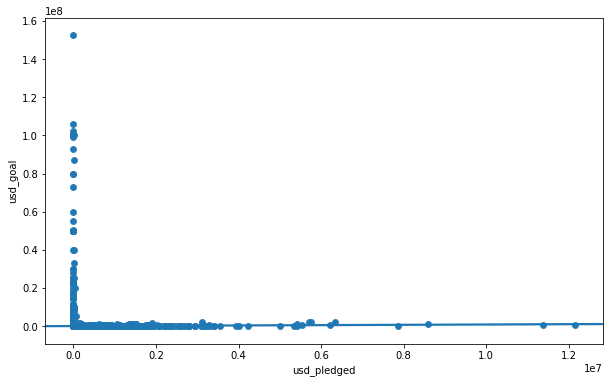

In [77]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=df_kickstarter['usd_pledged'], y=df_kickstarter['usd_goal']);

sns.regplot(x='usd_pledged',y='usd_goal',data=df_kickstarter, fit_reg=True) 

country
IT     175.671522
MX     276.987638
ES     499.403459
AT     677.914393
NL     688.596492
IE     736.284206
AU     811.160784
BE     848.710055
DE     849.146612
SE     909.256394
NO     980.187255
CA    1005.701333
DK    1010.069665
NZ    1057.888350
GB    1291.012706
CH    1291.244022
FR    1321.905187
SG    1600.510995
US    1760.000000
JP    2354.997788
LU    2374.495360
HK    6130.631380
Name: usd_pledged, dtype: float64

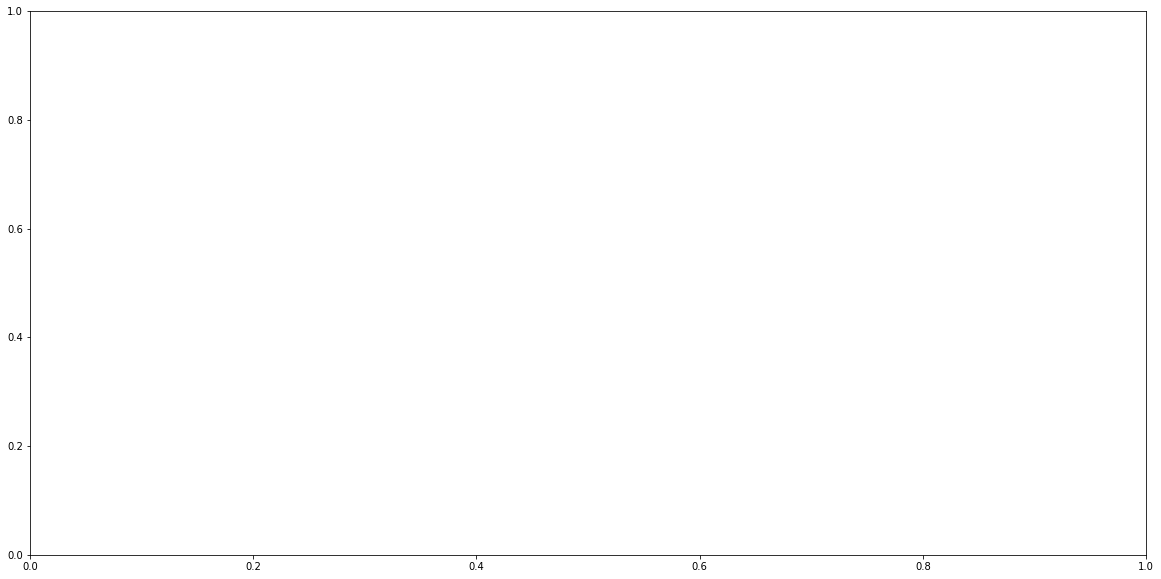

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
sorted_nb = df_kickstarter.groupby(['country'])['usd_pledged'].median().sort_values()
df_kickstarter.groupby(['country'])['usd_pledged'].median().sort_values()


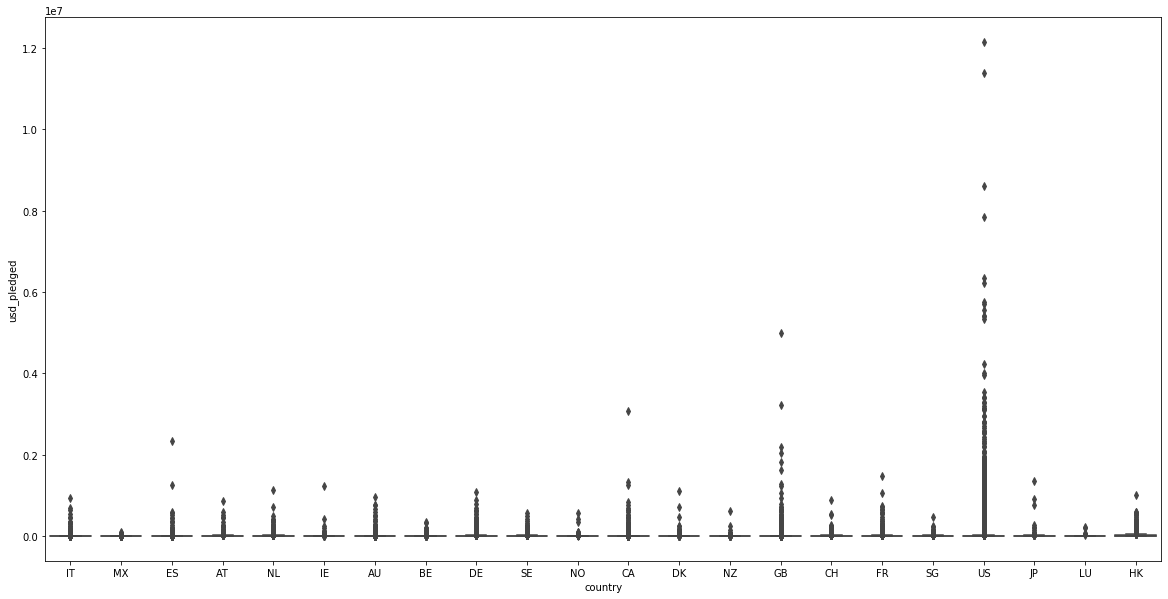

In [104]:
fig, ax = plt.subplots(figsize=(20,10))

sorted_nb = df_kickstarter.groupby(['country'])['usd_pledged'].median().sort_values()
sns.boxplot(x=df_kickstarter['country'], y=df_kickstarter['usd_pledged'], order=list(sorted_nb.index))